# Lab 05: K-Mean Clustering
## Sklearn

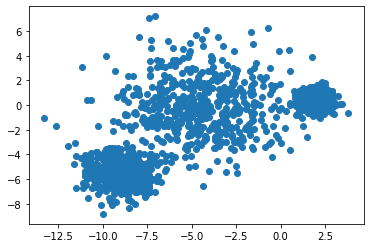

In [1]:
## data
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
data = pd.read_csv("data.csv")
X = data[["x1", "x2"]].values

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])

Sum of squared distances of samples to their closest cluster center:  5747.987366346275
[[-8.87177269 -5.36630437]
 [ 1.6400471   0.44241664]
 [-4.90914469  0.11313436]]


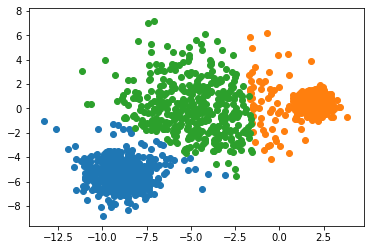

In [2]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3).fit(X)
clusters = kmean.predict(X)
for ii in range(3):
    plt.scatter(X[:,0][clusters==ii], X[:,1][clusters==ii])
print("Sum of squared distances of samples to their closest cluster center: ", kmean.inertia_)
print(kmean.cluster_centers_)

## Bài tập
- Hãy cài đặt lại KMeans Cluster Algorithm mô tả trong Lec05_Unsupervised_KMeans, slide 14 của thầy. Chủ yếu dùng numpy để tính toán nhé.
- Hãy lưu lại tổng within-cluster-variation của mọi clusters sau mỗi vòng lặp để vẽ hình

Kết quả cuối cùng tương tự như:

<img src="fig.jpg" width="50%" height="50%">

## Nộp bài
- Code và chạy kết quả lưu vào file notebook NMMH_TH5_MSSV.ipynb (notebook phải có kết quả chạy nếu ko xem như chưa làm)
- Nén thành file NMMH_TH5_MSSV.rar (.zip) và nộp về: dinhvietcuong1996@gmail.com
- Deadline: 11g59 thứ 4 ngày 24/06/2020. Nộp trễ bị chia đôi số điểm.

In [3]:
def init_centroid(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

In [4]:
def assign_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis = 1)

In [5]:
def update_centroid(X, labels, K):
    centers = np.zeros((K, X.shape[1]));
    wcv = 0;
    ## Lập đểtính centroid
    for k in range(K):
        Xk = X[labels == k, :]; #print(Xk.shape)
        centers[k,:] = np.mean(Xk, axis = 0)
        at_class_k = np.linalg.norm(Xk - centers[k,:] )**2 #/(Xk.shape[0]); #tinh độ sai lệch
        wcv += at_class_k
    return centers,wcv

In [6]:
def condition(centers, new_centers, epsilon):
    return (np.linalg.norm(centers - new_centers)) < epsilon

In [7]:
def kmeans(X, K):
    centers = [init_centroid(X, K)]
    labels = []
    it = [] 
    within_cluster_variation = []
    for i in range(0,1000000):
        labels.append(assign_labels(X, centers[-1]))                #assign label
        new_centers,wcv = update_centroid(X, labels[-1], K)         #Update center and calculate total distance
        
        # Check Stop Condition
        if condition(centers[-1], new_centers,0.00001):
               break
        centers.append(new_centers);
        it.append(i);
        within_cluster_variation.append(wcv);
        
    # Convert to array
    within_cluster_variation = np.array(within_cluster_variation)
    centers = np.array(centers) ;
    labels = np.array(labels);
    it = np.array(it);    
    return (centers, labels, it, within_cluster_variation)

In [8]:
K = 3

In [9]:
centers, labels, it,within_cluster_variation = kmeans(X,K)

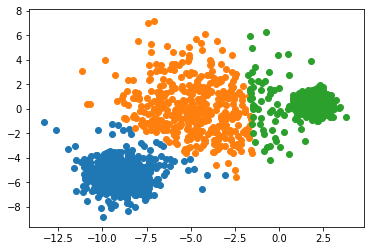

In [10]:
for i in range(0,K):
    plt.scatter(X[:,0][labels[-1]==i], X[:,1][labels[-1]==i])

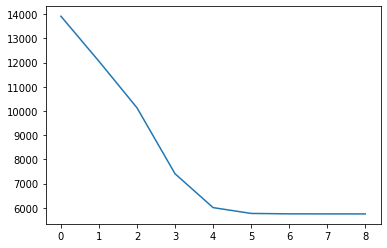

In [11]:
plt.plot(it,within_cluster_variation)